<h2>Overplot University of Wyoming flight track on NEXRAD radar reflectivity</h2>

In [2]:
import matplotlib.pyplot as plt
import glob
import os
import pyart
import awot

%matplotlib inline

<b>Set the directories and files to use. Read in the UWKA data using AWOT and the NEXRAD using Py-ART</b>

In [3]:
name_map = {
#        'time': 'time',
            # Aircraft Position
            'longitude': 'LONC',
            'latitude': 'LATC',
            'altitude': 'ztrue',
            'pressure_altitude': 'PALT',
            'tas': 'tas',
            'ias': 'aias',
            'true_heading': 'AVthead',
            'pitch': 'AVpitch',
            'roll_angle': 'AVroll',
            # Atmospheric State
            'pressure': 'pmb',
            'temperature': 'trf',
            'dewpoint_temperature': 'tdplicor',
            'thetad': 'thetad',
            'thetae': 'thetae',
            'relative_humidity': 'rh',
            'mixing_ratio': 'mr',
            'lwc': 'lwc100',
            'turb': 'turb',
            'g_accel': 'avnorma',
            # Radiometric
            'irtop': 'irtc',
            'irbottom': 'irbc',
            'swtop': 'swt',
            'swbottom': 'swb',
            # Wind derivations
            'Uwind': 'avuwind',
            'Vwind': 'avvwind',
            'Wwind': 'avwwind',
            'longitudinal_wind': 'avux',
            'latitudinal_wind': 'avvy',
            'wind_dir': 'avwdir',
            'wind_spd': 'axwmag',
            # Licor Concentrations
            'co2_conc': 'co21s',
            'h2o_conc': 'h2o1s',
            # Aerosol
            'pcasp_num': 'AS200_OBR',
            'pcasp_conc': 'CS200_OBR',
            'pcasp_mean_diam': 'DBARP_OBR',
            'pcasp_surf_area_conc': 'PSFCP_OBR',
            'pcasp_vol_conc': 'PVOLP_OBR',
            # Cloud Physics
            'conc_cpc': 'cpc_conc',
            # Miscellaneous
            'topo': 'topo'}

In [5]:
fdir = '/Users/guy/data/pecan'

# Get a list of NEXRAD files from a directory
filesKUEX = glob.glob(os.path.join(fdir, 'nex2', 'kuex', '*V06*'))

# Read in the file and put into an AWOT structure
radar = pyart.io.read(filesKUEX[6])
# Read in UWKA flight file
flight1Hz = awot.io.read_netcdf(os.path.join(fdir, '20150611.c1.nc'), mapping_dict=name_map)

Using 'time' to make AWOT time variable


<b>User supplied parameters</b>

In [14]:
# Set basemap parameters
lonlims = [-98.7, -97.2]
latlims = [39.5, 40.8]

proj = 'lcc'
res = 'l'
lon0 = radar.longitude['data'][0]
lat0 = radar.latitude['data'][0]

# Set range rings to plot
RngRings = [50, 100, 150]

# Set axes to plot map and colorbar
map_axes = [0.1, 0.1, 0.65, 0.65]
colorbar_axes = [0.85, 0.1, 0.02, 0.65]

# Set min/max values
refmin, refmax = 0., 60.  # dBZ min/max
timestep = 240  # number of seconds
flight_subset = ["2015-06-11T03:00:00", "2015-06-11T03:24:00"]

<b>Set up the figure. Creat the plot.</b>

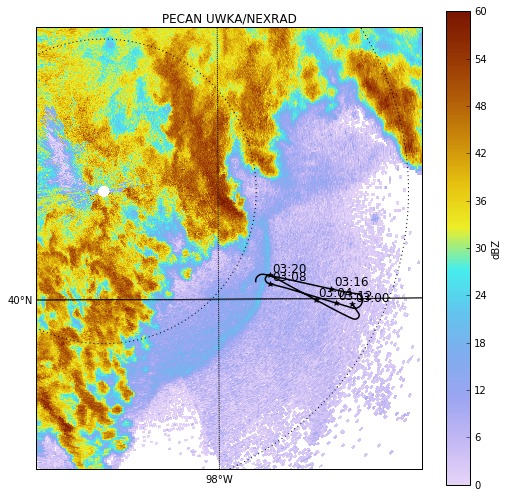

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Create a basemap for plotting
mapdisplay = pyart.graph.RadarMapDisplay(radar)
mapdisplay.plot_ppi_map('reflectivity', 0, vmin=refmin, vmax=refmax,
                        min_lon=lonlims[0], max_lon=lonlims[1],
                        min_lat=latlims[0], max_lat=latlims[1],
                        cmap='pyart_LangRainbow12', colorbar_label= 'dBZ',
                        projection=proj, resolution=res,
                        lat_0=lat0, lon_0=lon0,
                        title='PECAN UWKA/NEXRAD', ax=ax)

# This next loop will overplot radar range rings
for rng in RngRings:
    mapdisplay.plot_range_ring(rng, line_style='k:')

# Create the AWOT flight plot
f = awot.graph.FlightLevel(flight1Hz, basemap=mapdisplay.basemap)
# Add flight track
f.plot_trackmap(min_altitude=50., lw=2.5, add_cb=False,
                start_time=flight_subset[0], end_time=flight_subset[1], ax=ax)

# Add time stamps to the plot
f.time_stamps(start_time=flight_subset[0], end_time=flight_subset[1],
                           labelspacing=timestep, ax=ax)